In [3]:
import numpy as np
from PIL import Image, ImageOps
import pandas as pd
from pylab import *
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from scipy.stats import variation
import seaborn as sb
import matplotlib.pyplot as plt 

In [4]:
import glob
import cv2
def read_and_prep_images_red(img_paths):
        imgs = [cv2.imread(img_path) for img_path in img_paths]
        imgs = [cv2.resize(img, (100, 100), interpolation = cv2.INTER_AREA) for img in imgs]
        imgs = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in imgs]
        imgs = [cv2.filter2D(img, -1, mat_y) for img in imgs]
        imgs = [cv2.filter2D(img, -1, mat_x) for img in imgs]
        img_array = [array(img).flatten() for img in imgs]
        #output = preprocess_input(img_array)
        return(img_array)
data=['normal', 'pneumonia']
traindata={}
trainavg={}
avgpixeltrain=[]
count = 0
for i in data:
   
    img_paths=glob.glob(r"/Users/Tushar Gupta/Downloads/lungmini/ZhangLabData/CellData/chest_xray/train/"+i+"/*.jpeg")
    img_paths.extend(glob.glob(r"/Users/Tushar Gupta/Downloads/lungmini/ZhangLabData/CellData/chest_xray/train/"+i+"/*.jpg"))
   
    
    
    mat_y = np.array([[ -1, -2, -1], 
                       [ 0, 0, 0], 
                       [ 1, 2, 1]])
    mat_x = np.array([[ -1, 0, 1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])
    filter_vals = np.array([[-1, -1, 1, 2], [-1, -1, 1, 0], [-1, -1, 1, 1], [-1, -1, 1, 1]])
   
    traindata[i]= read_and_prep_images_red(img_paths)
    tries=shape(traindata[i])[0]
    convsum=[0]*shape(traindata[i])[1]
    for j in range(tries):
        convsum= traindata[i][j]+convsum

    trainavg[i]=convsum/tries
    count = count+1
    
    
    
    y_pos = np.arange(1, len(traindata[i][0])+1)

In [5]:
pd.set_option('display.max_rows', 5000)
traindata

{'normal': [array([8, 8, 0, ..., 0, 0, 0], dtype=uint8),
  array([255, 158,   0, ...,   0,   0,   0], dtype=uint8),
  array([ 0,  0,  0, ..., 38,  6,  6], dtype=uint8),
  array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
  array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
  array([0, 0, 8, ..., 0, 0, 0], dtype=uint8),
  array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
  array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
  array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
  array([66, 60, 76, ...,  0,  0,  0], dtype=uint8),
  array([  0,  32, 172, ...,   0,   0,   0], dtype=uint8),
  array([ 0,  0, 10, ...,  0,  0,  0], dtype=uint8),
  array([  0,  10, 176, ...,  88,  44,  44], dtype=uint8),
  array([255, 174,  98, ...,   6,   0,   0], dtype=uint8),
  array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
  array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
  array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
  array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
  array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
  array([0, 0, 0, ..., 0, 0, 0]

In [6]:
i = 0
countarray = [0 for i in range(2)]
totalcount = 0
for x in traindata:
    countarray[i] = len(traindata[x])
    print(x,':',countarray[i])
    totalcount += len(traindata[x])
    i += 1
print('Total Samples: ', totalcount)

normal : 1349
pneumonia : 3883
Total Samples:  5232


In [7]:
dfnorm = pd.DataFrame()
for i in range(countarray[0]):
    dfnorm[i] = traindata['normal'][i]
dfnorm = dfnorm.transpose()
dfnorm['type3'] = 'normal'
dfnorm

C:\Users\TUSHAR~1\AppData\Local\Temp/ipykernel_25328/4281197231.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i] = traindata['normal'][i]


0    1    2    3    4    5    6    7    8    9  ...  9991  9992  9993  \
0       8    8    0    0    6    6    0   72  208  208  ...     0     0     0   
1     255  158    0    0  214  255  255  255  255  134  ...     0     0     0   
2       0    0    0    0   44   88   90  108  150  184  ...    84   112   108   
3       0    0    0    0  180  255  255  255  255  255  ...     0     0     0   
4       0    0    0    0    0    0    0    0   18   66  ...     0     0     0   
5       0    0    8   14    6    0    0    0   10   10  ...     0     0     0   
6       0    0    0    0    0    0    0    0    0   10  ...     2     0     0   
7       0    0    0    0   18   70  112  102   78   80  ...    78    70    58   
8       0    0    0   24   24    0    0   94  255  255  ...    68    82    56   
9      66   60   76  106  130  152  164  154  146  162  ...    48     0     0   
10      0   32  172  255  255  255  255  255  255  255  ...     0     0     0   
11      0    0   10   30   44   58   80   90   94  116  ...     0    32    66   
12      0   10  176  255  255  255  166  114  150  184  ...   152   100    50   
13    255  174   98  122  152  186  226  255  255  255  ...    18    44    88   
14      0    0    0    0    0    0    0    0    0    0  ...     0     0     0   
15      0    0    0    0    0    0    4    4    0    0  ...    12     2     0   
16      0    0    0    0    0    0    0    0    0    0  ...     0    70   226   
17      0    0    0    0    0    0    0    0   60   60  ...     0     0     0   
18      0    0    0    0    0   14   14    0    0   16  ...    14    16     6   
19      0    0    0    0    0    0    0    0    0    0  ...   255   178    54   
20      0    0    0    0    0    0    0    0    0    0  ...     6     0     0   
21     98  134  180  208  222  230  252  255  255  255  ...     0     2     6   
22      0    0    0    0    0    0    0    0    0    0  ...    10   100   222   
23     14  118  104    0  116  255  255  228  174  214  ...    14    20    22   
24      0    0    0    0    0    0    0    0    0    0  ...     0     0     0   
25     10   12    8    2    2    8   14   16   14    8  ...     0     0     0   
26    255  255  255  255  196  108   42    8    0    0  ...     0     0     6   
27      0    0    0    0   24   66   54   30   72   94  ...     6     0     0   
28    202  166  126   90   58   32   12    2    0    0  ...     4     0     0   
29      0    0    0    0    0    0    0   36   36    0  ...     0     0     2   
30    192  255  255  255  255  255  255  255  255  255  ...     0     6    16   
31      0    0    0    0    0    0    0   70  252  255  ...     0     4     6   
32      0    0    0    0    0    0   50  146  152   90  ...     0     0     0   
33      0    0    0    0    0   12   30   32   14    0  ...   136   144    66   
34      0    0    0    0    0   46   46    0    0  188  ...    42   156   166   
35      0    0    0    0    2   62   78   22   24   20  ...    66    64    42   
36      0    0    0    0    0   18   56   46   18   52  ...    22    78   102   
37     36   66   88   92   92   88   84   86   94   90  ...     0    32    44   
38      0    0    0    0    0    0    0    0    2   28  ...     0     0     0   
39      0    0    0    0    0    0    0    0    8   30  ...     0     0     0   
40      0    0    0    0    0    0    0    0    0    0  ...    40     2     0   
41      0    0    0    0    0    0    0    0    6   18  ...     0     0     0   
42      0    0    0    0    0    0    0    0    0    0  ...     0     4     8   
43      0    0    0    0    0    0    0    0    0    0  ...    66    38    36   
44      0    0    0    0    0    0    0    0   40   54  ...    20    26    20   
45      0    0    0    0    0    2    6    4    0    0  ...    32    40    16   
46      0    0    0    0    0    2   22   30   10    0  ...     0     0     0   
47      0    0    0    0    0    0    0    0    0    0  ...     0    14    52   
48    106   18    0    0    0    0    0

In [8]:
dfpneu = pd.DataFrame()
for i in range(countarray[1]):
    dfpneu[i] = traindata['pneumonia'][i]
dfpneu = dfpneu.transpose()
dfpneu['type3'] = 'pneumonia'
dfpneu

C:\Users\TUSHAR~1\AppData\Local\Temp/ipykernel_25328/3535130727.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpneu[i] = traindata['pneumonia'][i]


0    1    2    3    4    5    6    7    8    9  ...  9991  9992  9993  \
0     255  255  255  202  255  255  255  255  255  212  ...    60    80    38   
1     100  122  106   54  168  255  255  255  255  148  ...     0     0     0   
2       0  182  255  255  212    0    0    0    0    0  ...     6     0     0   
3       0    0    0    2   14   24   36   76   90   52  ...     0     0     2   
4      72   88   60   16    0    0  120  255  255  255  ...    18    38    34   
5      22   52   70   68   60   58   62   62   44   14  ...    28    30    30   
6       0    0    0    0    0    0    0    0    0    0  ...     0     0     0   
7       0    0    0   14   14    0    0   32   78   84  ...     0     0     0   
8      12   36  120  166  106  216  255  255  255  184  ...    46    86    40   
9     255  255  148    8    0  122  255  255  255  164  ...     0     0     0   
10      0    0    0    0    0    0    0   54  206  255  ...     0     0     0   
11    255  255  255  255  255  255  255  255  255  255  ...     0    12    20   
12      0    0  196  255  255  255  255  255  255  255  ...     0     0     8   
13     26   10    2   38  226  255  255  255  254   52  ...     0     0     0   
14      8   58  172  255  172   28    0    0   28  116  ...     0     0     2   
15      0   26  122  248  255  255  255  255  255  255  ...    34    26    12   
16      0    0    0    0    0    0  122  255  255  255  ...     0     2     2   
17      0    0    0    0    0  160  255  255  255  255  ...    78    62    20   
18    255  240   30    0   34  255  255  188  152  255  ...     0     2     6   
19      0    0    0    0   48  255  255  255  112   74  ...     0     0     0   
20    255  255  255  255  255  255  255  255  252  192  ...     0     6     8   
21     12    0    0   64  180  242  238  158   46    0  ...     0     0     0   
22      0    4  120  255  255  255  255  255  214  106  ...     0     2     2   
23    136  118  106  108  120  255  255  255  255    0  ...    80    66    12   
24      0   18   76  108   90  150  220  110    0    0  ...    12     4     2   
25      6    2    0    2  150  255  255  255  128    0  ...     4     6     2   
26     66   78   96   94  228  255  255  255  100    8  ...     0     0     0   
27      0    0   62  186  255  255  255  255   68   52  ...     0     0     0   
28      8    0    0    4  104  255  255  255  255  255  ...     0     0     6   
29      0    0    0   94  255  255  255  255   72    0  ...     8     6    10   
30    255  255  255  206  184  255  255  255  255  255  ...     0    14    26   
31      0    0    0    0  166  255  255  255  188    0  ...    66    58    20   
32     78   72   70   84  106  255  255  255  255  220  ...    78    64    52   
33     62   18    0    0  148  255  255  255  216   62  ...   255   108     0   
34      0    0    0    0    0    0   36  128  134   70  ...     6    12     6   
35     96  106   78   24    0    0    0    0    0    0  ...     0     0     2   
36      0    0    0    0    0    2  202  255  255  255  ...    76    14     0   
37     42  130  122   36   94  255  255  255   84   10  ...     0     0     0   
38     82   94  158  226  252  255  255  255  255  255  ...     4    16    36   
39     68   58   48   40  116  255  255  255  255  160  ...    58    30    12   
40     76   72   52   50  116  255  255  255  255  168  ...     0     4     6   
41    244  188  116  104  255  255  255  255  244  106  ...     8     2     2   
42    202  255  255  255  255  255  158  198  255  255  ...    56    52    36   
43    160  174  162  190  255  255  255  255  255  255  ...    14    22    12   
44    255  255  202   64    0  236  255  255    0    0  ...     0     8    16   
45     56   84  136  240  255  255  255  255  118   96  ...     6     8    10   
46      0    0    0    0    0  190  255  255  100  148  ...     0     0     0   
47      0    0    0    0    0    0  102  255  255  255  ...    30    10     0   
48    140  144  138  126  116  112  102

In [9]:
testdata={}
testdataavg={}
testavgpixeldata=[]
count = 0
for i in data:

    img_paths=glob.glob(r"/Users/Tushar Gupta/Downloads/lungmini/ZhangLabData/CellData/chest_xray/test/"+i+"/*.jpeg")
    img_paths.extend(glob.glob(r"/Users/Tushar Gupta/Downloads/lungmini/ZhangLabData/CellData/chest_xray/test/"+i+"/*.jpg"))
    mat_y = np.array([[ -1, -2, -1], 
                       [ 0, 0, 0], 
                       [ 1, 2, 1]])
    mat_x = np.array([[ -1, 0, 1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])
    filter_vals = np.array([[-1, -1, 1, 2], [-1, -1, 1, 0], [-1, -1, 1, 1], [-1, -1, 1, 1]])
   
    testdata[i]= read_and_prep_images_red(img_paths)
    tries=shape(testdata[i])[0]
    convsum=[0]*shape(testdata[i])[1]
    for j in range(tries):
        convsum= testdata[i][j]+convsum

    testdataavg[i]=convsum/tries
    count = count+1
    
    
    
    y_pos = np.arange(1, len(testdata[i][0])+1)

In [10]:
i = 0
testcountarray = [0 for i in range(2)]
testtotalcount = 0
print("Test Set:")
for x in testdata:
    testcountarray[i] = len(testdata[x])
    print(x,':',testcountarray[i])
    testtotalcount += len(testdata[x])
    i += 1
print('Total Samples: ', testtotalcount)

Test Set:
normal : 234
pneumonia : 390
Total Samples:  624


In [11]:
testdfnorm = pd.DataFrame()
for i in range(testcountarray[0]):
    testdfnorm[i] = testdata['normal'][i]
testdfnorm = testdfnorm.transpose()
testdfnorm['type3'] = 'normal'
testdfnorm

C:\Users\TUSHAR~1\AppData\Local\Temp/ipykernel_25328/3631115949.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  testdfnorm[i] = testdata['normal'][i]


0    1    2    3    4    5    6    7    8    9  ...  9991  9992  9993  \
0      0    0    0    0    0    0    0    0    0    0  ...     0     0     0   
1      0    0    0    0    0    0    0    0    0    0  ...     0     8    10   
2      0    0    0   12   32   36   22    6    0    0  ...    58    14     0   
3      0    0  124  255  255  255  255  255  255  255  ...     0     0     0   
4      0    0    0    0    0    0    0    0    0    0  ...     0     0     0   
5      0    0    0    0    0   10   36   32   10   14  ...    10     0     0   
6      0    0    0    0    0   18   36   18    0    0  ...    94   100   104   
7      6   26   50   30    0    6   48   44   54  228  ...    14     0     0   
8      0    0    0    0    0    0    0    0    0    0  ...     0     0     0   
9    255  255  255  255  255  255  255  255  255  196  ...   255   255   150   
10     0    0    0    0    0    0    0    0    0    0  ...     0     0     0   
11     0    0    0    0   22   76  138  196  255  255  ...     0     0     0   
12     0    0    0    0    0   42   54   12    2   44  ...     4     4    10   
13     0    0    0    0    0    0    0    0    0    0  ...     2     0     0   
14     0    0    0    0    0    0    0    0    0    0  ...     0     0     0   
15     0    0   16   24    8    0    0   10   20   10  ...    14    28   124   
16     0    0    0    0    6    6    0    0   56  118  ...     0     8    36   
17    16   18   20   22   32   20    0    0    0   50  ...     0    84   164   
18     0    0   54  178  172   58   10    0    0    0  ...    78    40     8   
19    16    8    0    0   40   70   36   18   44   68  ...   148    56    12   
20     0    0    0    0    0    0    0    0    0    0  ...     0     0     0   
21     0    0    0    0    0    0    0    0    0    0  ...    80    54    14   
22     0    0    0    0    0    0   74  234  255  255  ...    72     0     0   
23   114   74   24    0    0    0    0    0    0    0  ...    30    34    18   
24     0    6    6    0    0   50  140  166  126   58  ...     0     0     2   
25     0    0    0    0    0   12   38   42   20    4  ...     0     0     0   
26     0    0    2   30   60   54   50   82  122   90  ...    86   112    54   
27    54  142  196  250  255  150   44    6    0    0  ...    10     0     0   
28     0    0    0    0    6   12   14   24   48   70  ...    12     8    24   
29   152   80   24    4   34   86   58    6    2   24  ...    26    24    20   
30     0    0    0    0    0   20  116  255  255  255  ...     0     6    14   
31     0    0    0    0    0   62  255  255  255  255  ...     0     4     6   
32   255  255  255  255  255  255  255  255  255  255  ...     0     0     0   
33     0    0    0    0    0    0    0    0    0    0  ...     0     0     0   
34     0    0    0    0    0   14   28   22   14   36  ...    12     2    10   
35     0    0    0    0    0   28   58   48   36   44  ...     4     0     0   
36     0    0    0    0    0    0    0    0    0    0  ...     0     0     0   
37    74   92   90   86  106   60    0    0    8   18  ...     0     6    30   
38     0    0    0    0    0    0    0    4   28   56  ...     0     0     0   
39     0    0    0    0    0    0    0    0    0    0  ...     0     0     0   
40     0    0    0    0    0    0    0    8   48   40  ...     0     0     0   
41     0    0    0    0    0    0    0    0    2   16  ...     0     0     0   
42    32   30   24   18    8    0    0    0    0    0  ...     4     6     2   
43     0    0    0    0    0    0   38   90   82   54  ...    62    32     8   
44     0    0    0    0    0    0    0    0   34   66  ...     0     0     0   
45     0    0    0    0    0    0    0    0    0    0  ...     0    20    74   
46     0    0    0    0    0    0    0    0    0    0  ...     6     2     0   
47     0    0    0    2    8   10    4    0    8   74  ...     0     0     0   
48    34   38   38   34   32   32   32   30   26   24  ...     0     0     0   
49    7

In [12]:
testdfpneu = pd.DataFrame()
for i in range(testcountarray[1]):
    testdfpneu[i] = testdata['pneumonia'][i]
testdfpneu = testdfpneu.transpose()
testdfpneu['type3'] = 'pneumonia'
testdfpneu

C:\Users\TUSHAR~1\AppData\Local\Temp/ipykernel_25328/395981993.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  testdfpneu[i] = testdata['pneumonia'][i]


0    1    2    3    4    5    6    7    8    9  ...  9991  9992  9993  \
0    255  255  255  255  255  255  255  255  255  255  ...    28     0     0   
1    255  255  255  255  255  255  255  255  255  255  ...     0     0     0   
2     44   34   26   22   22  186  255  255  255  255  ...     0    46    88   
3    178  184  156  118  222  255  255  255  255  255  ...    66   124    82   
4    118   86   44   14    4  178  255  255  255  158  ...    58    76    96   
5    126  108  106  116  126  255  255  255  255  255  ...     0     0     0   
6    146  120   78   50   50  202  255  255  255  140  ...     0    36    64   
7      0    2    2    0    0   10  226  255  255  255  ...     4     0     0   
8     86   82   80   80   78  244  255  255  255  255  ...     0     0     0   
9    142  118  104  116  140  206  255  255  255  255  ...     0     4     4   
10     0    0    6    6    0    0    0   14   28   28  ...     4     0     0   
11     0    0   18  160  255  255  184    2    0    0  ...     2     4     2   
12     0    0    0    0  194  255  255  255  134    0  ...     0     0     0   
13     0    0    0    0    2    2    0   26   74  100  ...     0     4    24   
14    20   56  104  116  170  255  255  255  242   88  ...   100    50    10   
15    70  255  255  255    0    0   38   38    0    0  ...     0     0     2   
16     0   30  114  194  234  255  255  255  255  255  ...    68   142   196   
17    32   94  204  255  255  255  226  118   88   96  ...     0    30    96   
18   234   74    0    4   16  150  255  255  255  255  ...     0     4     6   
19    88   54   14    0    0   96  255  255  255  126  ...    82    48    26   
20     0    0    0    0    2   10   14    6    0    0  ...   102    70    24   
21   140  255  255  255  255  255  255  255  255  216  ...     2     0     0   
22   108   38   22   38  158  255  255  255  255    4  ...     0     6     8   
23    64   24    0    0    0  202  255  255  255    0  ...     0     0     0   
24     0   24   56   64   72   80  228  255  255  255  ...     0     0     0   
25    24   20    8    0    0    0  114  255  255  255  ...    30     2     0   
26     0    0    0    0    0    0   92  144   52  104  ...     6     2     0   
27     0    0    0    0    0    0    0    0    0    0  ...     8     0     0   
28     8    0    0    0   60  255  255  255  255  255  ...     0     2     4   
29   132  148  110   64   54  144  255  255  255  255  ...     2     0     0   
30     0   10   88  220  255  198  202  255  255  255  ...    14    28    16   
31     0    0   14  104  255  255  255  255  255  255  ...    32     8     0   
32    56   24    0    0    0    6  126  255  255  255  ...    14     2     0   
33    12    4   16  100  255  255  255  255  255  124  ...     0     0     0   
34    10    8    2    0    0   22  255  255  255  255  ...    30    26     6   
35     0    0   34  188  255  255  255  255  255  212  ...     0     4     6   
36   255  255  255    0    0    0  255  255  255  255  ...    30    52    78   
37     0    0    0    0    0  136  255  255  255  152  ...    44    66    56   
38    34   50  118  156  108   46   12    0    0    0  ...    10    20    20   
39     0   10   28   22    4    0  164  255  255  255  ...    48    40    18   
40    26   46   20    0    0  122  255  255  255  255  ...    60     0    10   
41   255  236  104   48   48   56  178  255  255  255  ...     0     0     0   
42     2    6    6    2    0    0    0    0    0    0  ...     0     0     0   
43     6   24   34   52   78  158  255  255  255  255  ...     0     0     0   
44     0    0    2   38   92  255  255  255  108    0  ...    24     4     0   
45   186  136   50    0    0    0  112  255  255  234  ...     0     0     0   
46     6   16   14   10   14   58  255  255  255  255  ...     0     0     0   
47    20    0    0   22   60   74  116  255  255  255  ...     0     0     0   
48     0   20   40   44   54   66   52   16    0    0  ...     0     0     0   
49    9

In [13]:
traindf = pd.DataFrame()
traindf = traindf.append(dfnorm, ignore_index = True)
traindf = traindf.append(dfpneu, ignore_index = True)
traindf

0    1    2    3    4    5    6    7    8    9  ...  9991  9992  9993  \
0       8    8    0    0    6    6    0   72  208  208  ...     0     0     0   
1     255  158    0    0  214  255  255  255  255  134  ...     0     0     0   
2       0    0    0    0   44   88   90  108  150  184  ...    84   112   108   
3       0    0    0    0  180  255  255  255  255  255  ...     0     0     0   
4       0    0    0    0    0    0    0    0   18   66  ...     0     0     0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
5227  152  152  152  156  164  164  156  160  184  216  ...     0     0     0   
5228  255  255  255    0   28   66   88  106  108  104  ...     4     0     0   
5229    0    0    0    0    0    0    0    0    4   12  ...     0    46    84   
5230    8    0    0    0    0    0   14   30   52   80  ...    54    42    18   
5231    4    0    0    0    0    0    0    0    0    0  ...    78    72    24   

      9994  9995  9996  9997  9998  9999      type3  
0        0     0     0     0     0     0     normal  
1        0     0     0     0     0     0     normal  
2       90    92    82    38     6     6     normal  
3        0     0     0     0     0     0     normal  
4        0     0     0     0     0     0     normal  
...    ...   ...   ...   ...   ...   ...        ...  
5227    28    52    40    28    20    20  pneumonia  
5228     0     0     0     0     0     0  pneumonia  
5229    38     0    12    58   106   106  pneumonia  
5230     4     2     4     2     0     0  pneumonia  
5231     0     4    28    50    50    50  pneumonia  

[5232 rows x 10001 columns]

In [14]:
testdf = pd.DataFrame()
testdf = testdf.append(testdfnorm, ignore_index = True)
testdf = testdf.append(testdfpneu, ignore_index = True)
testdf

0    1    2    3    4    5    6    7    8    9  ...  9991  9992  9993  \
0      0    0    0    0    0    0    0    0    0    0  ...     0     0     0   
1      0    0    0    0    0    0    0    0    0    0  ...     0     8    10   
2      0    0    0   12   32   36   22    6    0    0  ...    58    14     0   
3      0    0  124  255  255  255  255  255  255  255  ...     0     0     0   
4      0    0    0    0    0    0    0    0    0    0  ...     0     0     0   
5      0    0    0    0    0   10   36   32   10   14  ...    10     0     0   
6      0    0    0    0    0   18   36   18    0    0  ...    94   100   104   
7      6   26   50   30    0    6   48   44   54  228  ...    14     0     0   
8      0    0    0    0    0    0    0    0    0    0  ...     0     0     0   
9    255  255  255  255  255  255  255  255  255  196  ...   255   255   150   
10     0    0    0    0    0    0    0    0    0    0  ...     0     0     0   
11     0    0    0    0   22   76  138  196  255  255  ...     0     0     0   
12     0    0    0    0    0   42   54   12    2   44  ...     4     4    10   
13     0    0    0    0    0    0    0    0    0    0  ...     2     0     0   
14     0    0    0    0    0    0    0    0    0    0  ...     0     0     0   
15     0    0   16   24    8    0    0   10   20   10  ...    14    28   124   
16     0    0    0    0    6    6    0    0   56  118  ...     0     8    36   
17    16   18   20   22   32   20    0    0    0   50  ...     0    84   164   
18     0    0   54  178  172   58   10    0    0    0  ...    78    40     8   
19    16    8    0    0   40   70   36   18   44   68  ...   148    56    12   
20     0    0    0    0    0    0    0    0    0    0  ...     0     0     0   
21     0    0    0    0    0    0    0    0    0    0  ...    80    54    14   
22     0    0    0    0    0    0   74  234  255  255  ...    72     0     0   
23   114   74   24    0    0    0    0    0    0    0  ...    30    34    18   
24     0    6    6    0    0   50  140  166  126   58  ...     0     0     2   
25     0    0    0    0    0   12   38   42   20    4  ...     0     0     0   
26     0    0    2   30   60   54   50   82  122   90  ...    86   112    54   
27    54  142  196  250  255  150   44    6    0    0  ...    10     0     0   
28     0    0    0    0    6   12   14   24   48   70  ...    12     8    24   
29   152   80   24    4   34   86   58    6    2   24  ...    26    24    20   
30     0    0    0    0    0   20  116  255  255  255  ...     0     6    14   
31     0    0    0    0    0   62  255  255  255  255  ...     0     4     6   
32   255  255  255  255  255  255  255  255  255  255  ...     0     0     0   
33     0    0    0    0    0    0    0    0    0    0  ...     0     0     0   
34     0    0    0    0    0   14   28   22   14   36  ...    12     2    10   
35     0    0    0    0    0   28   58   48   36   44  ...     4     0     0   
36     0    0    0    0    0    0    0    0    0    0  ...     0     0     0   
37    74   92   90   86  106   60    0    0    8   18  ...     0     6    30   
38     0    0    0    0    0    0    0    4   28   56  ...     0     0     0   
39     0    0    0    0    0    0    0    0    0    0  ...     0     0     0   
40     0    0    0    0    0    0    0    8   48   40  ...     0     0     0   
41     0    0    0    0    0    0    0    0    2   16  ...     0     0     0   
42    32   30   24   18    8    0    0    0    0    0  ...     4     6     2   
43     0    0    0    0    0    0   38   90   82   54  ...    62    32     8   
44     0    0    0    0    0    0    0    0   34   66  ...     0     0     0   
45     0    0    0    0    0    0    0    0    0    0  ...     0    20    74   
46     0    0    0    0    0    0    0    0    0    0  ...     6     2     0   
47     0    0    0    2    8   10    4    0    8   74  ...     0     0     0   
48    34   38   38   34   32   32   32   30   26   24  ...     0     0     0   
49    7

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
temp = pd.DataFrame
trainpredictors = traindf.drop(["type3"],axis = 1)
trainpredictors

0     1     2     3     4     5     6     7     8     9     ...  9990  \
0        8     8     0     0     6     6     0    72   208   208  ...     0   
1      255   158     0     0   214   255   255   255   255   134  ...     0   
2        0     0     0     0    44    88    90   108   150   184  ...   108   
3        0     0     0     0   180   255   255   255   255   255  ...     0   
4        0     0     0     0     0     0     0     0    18    66  ...     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
5227   152   152   152   156   164   164   156   160   184   216  ...     2   
5228   255   255   255     0    28    66    88   106   108   104  ...    14   
5229     0     0     0     0     0     0     0     0     4    12  ...     0   
5230     8     0     0     0     0     0    14    30    52    80  ...    26   
5231     4     0     0     0     0     0     0     0     0     0  ...    30   

      9991  9992  9993  9994  9995  9996  9997  9998  9999  
0        0     0     0     0     0     0     0     0     0  
1        0     0     0     0     0     0     0     0     0  
2       84   112   108    90    92    82    38     6     6  
3        0     0     0     0     0     0     0     0     0  
4        0     0     0     0     0     0     0     0     0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
5227     0     0     0    28    52    40    28    20    20  
5228     4     0     0     0     0     0     0     0     0  
5229     0    46    84    38     0    12    58   106   106  
5230    54    42    18     4     2     4     2     0     0  
5231    78    72    24     0     4    28    50    50    50  

[5232 rows x 10000 columns]

In [16]:
testpredictors = testdf.drop(['type3'],axis = 1)
testpredictors

0     1     2     3     4     5     6     7     8     9     ...  9990  \
0       0     0     0     0     0     0     0     0     0     0  ...     6   
1       0     0     0     0     0     0     0     0     0     0  ...     0   
2       0     0     0    12    32    36    22     6     0     0  ...   122   
3       0     0   124   255   255   255   255   255   255   255  ...     0   
4       0     0     0     0     0     0     0     0     0     0  ...     0   
5       0     0     0     0     0    10    36    32    10    14  ...    36   
6       0     0     0     0     0    18    36    18     0     0  ...   102   
7       6    26    50    30     0     6    48    44    54   228  ...    82   
8       0     0     0     0     0     0     0     0     0     0  ...     0   
9     255   255   255   255   255   255   255   255   255   196  ...   255   
10      0     0     0     0     0     0     0     0     0     0  ...     0   
11      0     0     0     0    22    76   138   196   255   255  ...     2   
12      0     0     0     0     0    42    54    12     2    44  ...     2   
13      0     0     0     0     0     0     0     0     0     0  ...     8   
14      0     0     0     0     0     0     0     0     0     0  ...     0   
15      0     0    16    24     8     0     0    10    20    10  ...    14   
16      0     0     0     0     6     6     0     0    56   118  ...     0   
17     16    18    20    22    32    20     0     0     0    50  ...    44   
18      0     0    54   178   172    58    10     0     0     0  ...    54   
19     16     8     0     0    40    70    36    18    44    68  ...   250   
20      0     0     0     0     0     0     0     0     0     0  ...     0   
21      0     0     0     0     0     0     0     0     0     0  ...    84   
22      0     0     0     0     0     0    74   234   255   255  ...   252   
23    114    74    24     0     0     0     0     0     0     0  ...    50   
24      0     6     6     0     0    50   140   166   126    58  ...     0   
25      0     0     0     0     0    12    38    42    20     4  ...     0   
26      0     0     2    30    60    54    50    82   122    90  ...    18   
27     54   142   196   250   255   150    44     6     0     0  ...    30   
28      0     0     0     0     6    12    14    24    48    70  ...    40   
29    152    80    24     4    34    86    58     6     2    24  ...    26   
30      0     0     0     0     0    20   116   255   255   255  ...     0   
31      0     0     0     0     0    62   255   255   255   255  ...     0   
32    255   255   255   255   255   255   255   255   255   255  ...     0   
33      0     0     0     0     0     0     0     0     0     0  ...     0   
34      0     0     0     0     0    14    28    22    14    36  ...    82   
35      0     0     0     0     0    28    58    48    36    44  ...    16   
36      0     0     0     0     0     0     0     0     0     0  ...     0   
37     74    92    90    86   106    60     0     0     8    18  ...     0   
38      0     0     0     0     0     0     0     4    28    56  ...     0   
39      0     0     0     0     0     0     0     0     0     0  ...     0   
40      0     0     0     0     0     0     0     8    48    40  ...     0   
41      0     0     0     0     0     0     0     0     2    16  ...     0   
42     32    30    24    18     8     0     0     0     0     0  ...     0   
43      0     0     0     0     0     0    38    90    82    54  ...   102   
44      0     0     0     0     0     0     0     0    34    66  ...     0   
45      0     0     0     0     0     0     0     0     0     0  ...     2   
46      0     0     0     0     0     0     0     0     0     0  ...     6   
47      0     0     0     2     8    10     4     0     8    74  ...     0   
48     34    38    38    34    32    32    32    30    26    24  ...     0   
49     78    98   138   118    68   112   208   248   246   255  ...    84   
50     38    82    70    18

In [17]:
y_train = pd.DataFrame(traindf['type3'].astype('category'))
y_test = pd.DataFrame(testdf['type3'].astype('category'))
X_train = trainpredictors
X_test = testpredictors

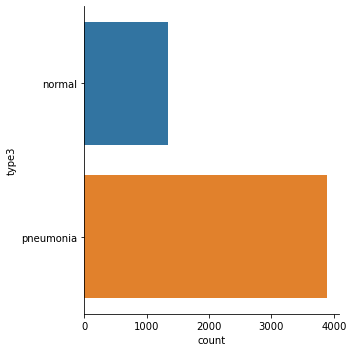

In [18]:
sb.catplot(y = "type3", data = y_train, kind = "count")

In [19]:
dectree = DecisionTreeClassifier(max_depth = 15)
dectree.fit(X_train, y_train)   
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.992737003058104

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7467948717948718



<AxesSubplot:>

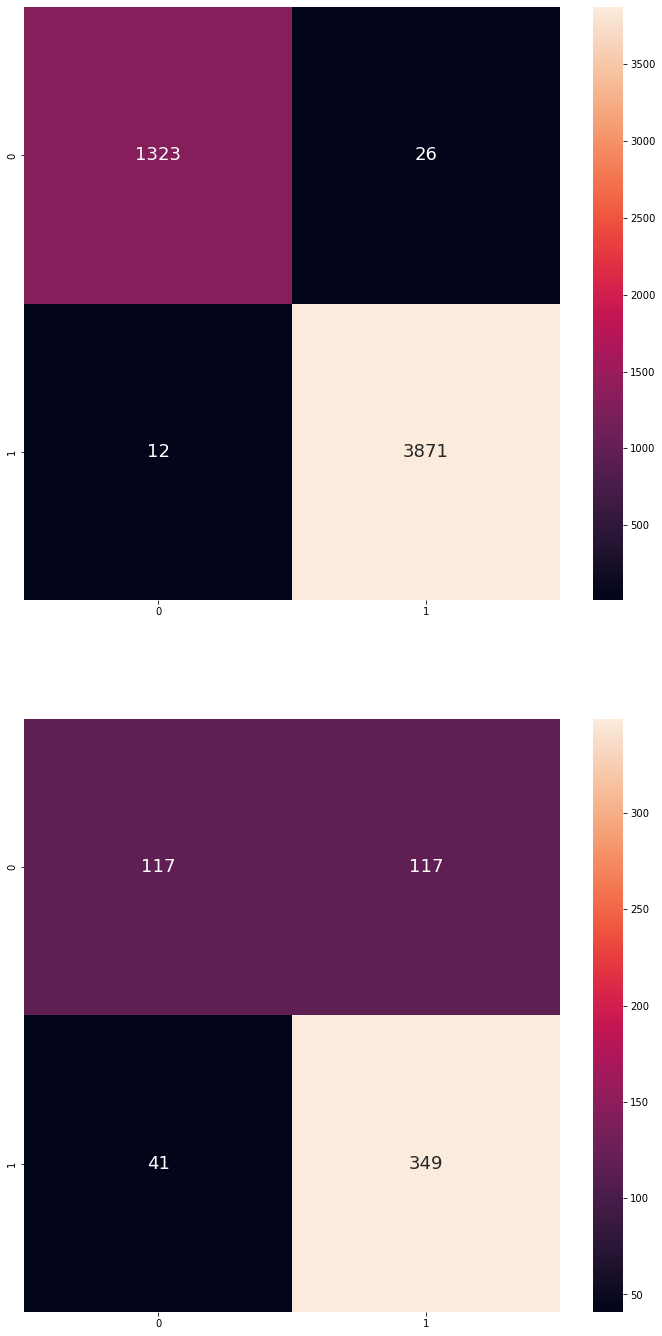

In [20]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()


print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()


f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [22]:
iter_list= []
for i in range(1, 100, 5):
    iter_list.append(i)

In [23]:
# Looping over the parameters

train_accuracy = []
test_accuracy = []



for c in iter_list:
    log_reg2 = LogisticRegression(solver='lbfgs', max_iter=c)
    log_reg2.fit(X_train, np.ravel(y_train))
    predictions = log_reg2.predict(X_test)
    score1 = accuracy_score(y_test, predictions)
    test_accuracy.append(score1)
    predictions = log_reg2.predict(X_train)
    score1 = accuracy_score(y_train, predictions)
    train_accuracy.append(score1)

C:\Users\Tushar Gupta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Tushar Gupta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

C:\Users\Tushar Gupta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Tushar Gupta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

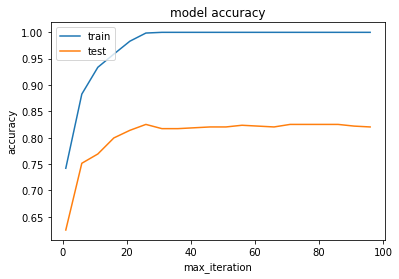

In [24]:
plt.plot(iter_list, train_accuracy)
plt.plot(iter_list, test_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('max_iteration')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
#logmodel with 26 iteration
logmodel = LogisticRegression(solver='lbfgs', max_iter=26)
logmodel.fit(X_train, np.ravel(y_train))

predictions = logmodel.predict(X_test)

print("Accuracy: ",accuracy_score(y_test, predictions))

Accuracy:  0.8253205128205128


C:\Users\Tushar Gupta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=26)
logmodel.fit(X_train, np.ravel(y_train))


predictions1 = logmodel.predict(X_train)
print("\t\tTrain Data")
print("Precision Score \t: ",precision_score(y_train, predictions1,
                                           average='weighted'))
print("Accuracy\t\t: ",accuracy_score(y_train, predictions1))

print("\t\tTest Data")
predictions = logmodel.predict(X_test)
print("Precision Score \t: ",precision_score(y_test, predictions,
                                           average='weighted'))
print("Accuracy\t\t: ",accuracy_score(y_test, predictions))


C:\Users\Tushar Gupta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


		Train Data
Precision Score 	:  0.9986624981203052
Accuracy		:  0.9986620795107034
		Test Data
Precision Score 	:  0.8464609714609715
Accuracy		:  0.8253205128205128


<AxesSubplot:>

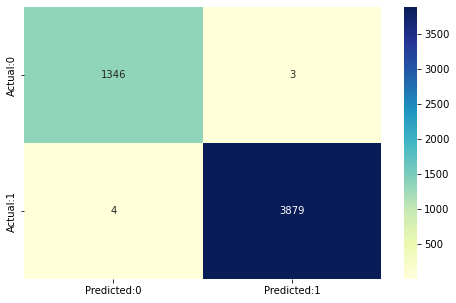

In [27]:
cm=confusion_matrix(y_train,predictions1)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sb.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [28]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [29]:
print("\t\t\t TRAIN DATA")
print('The acuuracy of the model   \t   = TP+TN/(TP+TN+FP+FN)\t = ',(TP+TN)/float(TP+TN+FP+FN),'\n',
'The Missclassification    \t   = 1-Accuracy  \t\t = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) \t\t = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) \t\t = ',TN/float(TN+FP),'\n',

'Positive Predictive value \t   = TP/(TP+FP) \t\t = ',TP/float(TP+FP),'\n',

'Negative predictive Value \t   = TN/(TN+FN)\t\t\t = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio\t   = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio \t   = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

			 TRAIN DATA
The acuuracy of the model   	   = TP+TN/(TP+TN+FP+FN)	 =  0.9986620795107034 
 The Missclassification    	   = 1-Accuracy  		 =  0.0013379204892965957 
 Sensitivity or True Positive Rate = TP/(TP+FN) 		 =  0.9989698686582539 
 Specificity or True Negative Rate = TN/(TN+FP) 		 =  0.9977761304670126 
 Positive Predictive value 	   = TP/(TP+FP) 		 =  0.999227202472952 
 Negative predictive Value 	   = TN/(TN+FN)			 =  0.997037037037037 
 Positive Likelihood Ratio	   = Sensitivity/(1-Specificity) =  449.20345094000135 
 Negative likelihood Ratio 	   = (1-Sensitivity)/Specificity =  0.0010324273254201466


<AxesSubplot:>

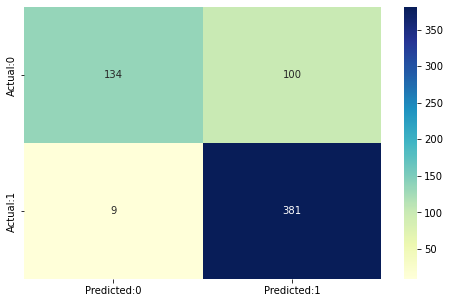

In [30]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sb.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [31]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [32]:
print("\t\t\t TEST DATA")
print('The acuuracy of the model   \t   = TP+TN/(TP+TN+FP+FN)\t = ',(TP+TN)/float(TP+TN+FP+FN),'\n',
'The Missclassification    \t   = 1-Accuracy  \t\t = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) \t\t = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) \t\t = ',TN/float(TN+FP),'\n',

'Positive Predictive value \t   = TP/(TP+FP) \t\t = ',TP/float(TP+FP),'\n',

'Negative predictive Value \t   = TN/(TN+FN)\t\t\t = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio\t   = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio \t   = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

			 TEST DATA
The acuuracy of the model   	   = TP+TN/(TP+TN+FP+FN)	 =  0.8253205128205128 
 The Missclassification    	   = 1-Accuracy  		 =  0.17467948717948723 
 Sensitivity or True Positive Rate = TP/(TP+FN) 		 =  0.9769230769230769 
 Specificity or True Negative Rate = TN/(TN+FP) 		 =  0.5726495726495726 
 Positive Predictive value 	   = TP/(TP+FP) 		 =  0.7920997920997921 
 Negative predictive Value 	   = TN/(TN+FN)			 =  0.9370629370629371 
 Positive Likelihood Ratio	   = Sensitivity/(1-Specificity) =  2.2859999999999996 
 Negative likelihood Ratio 	   = (1-Sensitivity)/Specificity =  0.04029850746268662


In [33]:

log_reg = LogisticRegression(solver='lbfgs', max_iter=26)

log_reg.fit(X_train, y_train)

C:\Users\Tushar Gupta\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Tushar Gupta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=26)

In [34]:
# predict - Predict class labels for samples in X
log_reg.predict(X_train)
y_pred = log_reg.predict(X_train)

# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(X_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

array([[ 3.96484329e-04,  7.86143429e-04,  1.01846052e-03, ...,
        -3.37283259e-04,  2.05493845e-05,  2.05493845e-05]])

In [35]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sb.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sb.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [36]:
# Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(X_test, y_test))

The Training Accuracy is:  0.9986620795107034
The Testing Accuracy is:  0.8253205128205128


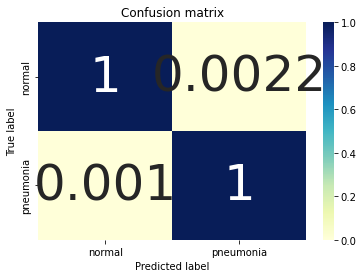

In [37]:
# Visualizing cm
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

In [38]:
log_reg.classes_

array(['normal', 'pneumonia'], dtype=object)

In [39]:
cm.sum(axis=1)
cm_norm

array([[0.99777613, 0.00222387],
       [0.00103013, 0.99896987]])

In [40]:
cm

array([[1346,    3],
       [   4, 3879]], dtype=int64)

In [41]:
cm.sum(axis=0)

array([1350, 3882], dtype=int64)

In [42]:
np.diag(cm)

array([1346, 3879], dtype=int64)

In [43]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is: ", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:\t   ", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is:", FNR)

##Total averages :
print("")
print("The average TPR is:\t\t   ", TPR.sum()/2)
print("The average Precision is:\t   ", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)

The True Positive Rate is:  [0.99777613 0.99896987]
The Precision is:	    [0.99703704 0.9992272 ]
The False positive rate is: [0.00103013 0.00222387]
The False Negative Rate is: [0.00222387 0.00103013]

The average TPR is:		    0.9983729995626333
The average Precision is:	    0.9981321197549946
The average False positive rate is: 0.0016270004373667353
The average False Negative Rate is: 0.0016270004373667353


In [44]:
a_1d_array=logmodel.coef_

In [45]:
reshaped_to_2d = np.reshape(a_1d_array, (-1, 100))

In [46]:
shape(reshaped_to_2d)

(100, 100)

In [ ]:
import seaborn as sb
sb.set(rc = {'figure.figsize':(10,10)})
sb.heatmap(reshaped_to_2d)

##Pneumonia is 1 and Normal is 0. So the Dark red are pixels that contribute to normality, 
##while lighter numbers contribute to Pneumonia. 